# One leg PIP model 🦿 🎐

## Burocrazia
La maggior parte di queste librerie servono per fare il video in Colab

In [1]:
!pip install pybullet imageio-ffmpeg

import os
import time
import math
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import pybullet as p
import pybullet_data as pd
import cv2
import imageio_ffmpeg
from base64 import b64encode
from IPython.display import HTML


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 MB 7.4 MB/s eta 0:00:00


## Getting model 🦭 📡

In [2]:
!git clone https://github.com/Gaianeve/Real_Mega_Fufi.git
%cd Real_Mega_Fufi/Robot/1LegTrail/Giunto_versione_fascia_elastica

Cloning into 'Real_Mega_Fufi'...
remote: Enumerating objects: 1211, done.
remote: Counting objects: 100% (654/654), done.
remote: Compressing objects: 100% (310/310), done.
remote: Total 1211 (delta 502), reused 476 (delta 343), pack-reused 557 (from 1)
Receiving objects: 100% (1211/1211), 12.30 MiB | 10.07 MiB/s, done.
Resolving deltas: 100% (815/815), done.
/content/Real_Mega_Fufi/Robot/1LegTrail/Giunto_versione_fascia_elastica


## Pybullet set up 🔖 📚 🐨

In [22]:
#connecting
p.connect(p.DIRECT)

# using FEM
p.resetSimulation(p.RESET_USE_DEFORMABLE_WORLD)
#set sampling time
p.setGravity(0, 0, 0)
# set sampling time: if too high it becomes instable
#p.setTimeStep(0.0001)
#p.setPhysicsEngineParameter(numSolverIterations=2000)
# Aggiungi il percorso dei dati PyBullet for the plane
p.setAdditionalSearchPath(pd.getDataPath())


## Importing objects and chaning visual shape 🏮 🍀

Importing plane and fix it on the ground

In [23]:
useFixedBase_flag = True
plane_pos = [0,0,0]
plane = p.loadURDF("plane.urdf", plane_pos, useFixedBase=useFixedBase_flag)

Importing joint. It's a .obj file, so be sure to look at the important note in this notebook [here](https://colab.research.google.com/github/Gaianeve/Real_Mega_Fufi/blob/main/Robot/1LegTrail/See_model.ipynb?hl=it#scrollTo=cY6oVd0Um4e_)

In [24]:
elastic_joint_id = p.loadSoftBody("elastic_joint.obj",
                                  mass=0.0569,  # Calcolare in base al volume del modello
                                  useNeoHookean=1,
                                  NeoHookeanMu=76.92e9,  # Shear modulus (calculated)
                                  NeoHookeanLambda=115.38e9,  # First Lamé parameter (calculated)
                                  NeoHookeanDamping=0.07,  # Moderate damping
                                  collisionMargin=0.03,
                                  useSelfCollision=0,
                                  frictionCoeff=0.8,
                                  springElasticStiffness=300e9,  # Increased stiffness
                                  springDampingStiffness=30e9,  # Added damping (proportional to stiffness)
                                  springBendingStiffness=300e9,  # Increased bending stiffness
                                  useFaceContact=1
                                )
#arancione
p.changeVisualShape(elastic_joint_id, -1, rgbaColor=[1, 0.65, 0, 1])

print(elastic_joint_id)
#print(p.getCollisionShapeData(elastic_joint_id, -1))

1


### Soft body function parameters explanation 🔖 📚 ℹ

♨ 🍂   `springElasticStiffness`

  **Description**: This parameter controls how resistant the material is to stretching or compression along its edges. It represents the stiffness of the "springs" that connect adjacent nodes in the soft body mesh.

  **Role in Simulation**: Higher values make the soft body stiffer, reducing deformation under forces.
  Lower values allow the soft body to stretch or compress more easily.

  **Real-World Analogy:** Think of this as the equivalent of the Young's modulus for the spring connections in the soft body mesh.


 ♨ 🍂   `springDampingStiffness`

  **Description**: This parameter defines the damping force applied to the springs in the soft body. Damping opposes motion, dissipating energy from oscillations or vibrations in the soft body.

  **Role in Simulation**:Helps stabilize the simulation by preventing excessive oscillations of the nodes after being stretched or compressed.
  Higher damping stiffens the response, slowing down deformations but improving stability.

  **Real-World Analogy**: Comparable to the behavior of shock absorbers in a car's suspension system, which dissipate energy from motion.



 ♨ 🍂  `springBendingStiffness`

  **Description**: This parameter controls the resistance of the soft body to bending or folding. It defines how stiff the material is against angular deformations between connected triangles in the mesh.
  **Role in Simulation**:
  Affects the "bending springs" that resist changes in angles between adjacent mesh faces.
  Higher values make the material more resistant to folding or wrinkling.
  **Real-World Analogy**: Imagine bending a thin sheet of metal versus bending a rubber sheet. Higher bending stiffness corresponds to the behavior of the metal sheet.


###Interaction Between Parameters ❄ 🎇 🦹
The elastic stiffness, damping stiffness, and bending stiffness work together to simulate the overall behavior of the soft body. Here's how they interact:

1. *Elastic Stiffness* ensures the material retains its shape and resists elongation.
2. *Damping Stiffness* prevents oscillations and stabilizes the simulation, especially under dynamic forces like gravity or collisions.
3. *Bending Stiffness* keeps the material resistant to folding or sharp bends, preserving a more rigid structure.






###Choosing Values

1. **springElasticStiffness**: Start with a value proportional to the Young's modulus of your material.
2. **springDampingStiffness**: Choose a damping value relative to the elastic stiffness, usually between `0.01*springElasticStiffness` and `0.1*springElasticStiffness`
3. **springBendingStiffness**: Set this close to the elastic stiffness for materials where bending resistance is critical.

In [25]:
#p.addUserDebugLine([0,0,0], [0,0,3])
#p.addUserDebugLine([0,0,0], [0,3,0])
#p.addUserDebugLine([0,0,0], [3,0,0])

Importing column and leg. See the same notebook as before for details on positions.

In [26]:
#get column
joint_position, joint_orientation = p.getBasePositionAndOrientation(elastic_joint_id)
joint_x, joint_y = joint_position[0], joint_position[1]
column_position = [joint_x, joint_y, 0.1]
column_orientation = p.getQuaternionFromEuler([0,0,0])

column_id = p.loadURDF("pippa_oneleg_column.urdf", \
                       basePosition = column_position, \
                       baseOrientation =column_orientation , \
                       useFixedBase= useFixedBase_flag)
# verdino
p.changeVisualShape(column_id, -1, rgbaColor=[0.5, 1, 0.5, 1])

#get leg
leg_position = [joint_x,joint_y,0.6175]
leg_orientation = joint_orientation
leg_id = p.loadURDF("pippa_oneleg_leg.urdf", \
                       basePosition = leg_position, \
                       baseOrientation = leg_orientation,\
                       useFixedBase = False )
# azzurrino
p.changeVisualShape(leg_id, -1, rgbaColor=[0.5, 0.8, 1, 1])

##change materials

In [27]:
#AL 6082 (Alluminio)
lateralFriction_Al = 0.8
restitution_Al = 0
rollingFriction_Al = 0
spinningFriction_Al = 0.1
linearDamping_Al = 0
angularDamping_Al = 0
contactStiffness_Al = 3e8
contactDamping_Al = 100

# AISI 304 (Acciaio Inox)
lateralFriction_AISI = 0.8
restitution_AISI = 0
rollingFriction_AISI = 0.001
spinningFriction_AISI= 0.15
linearDamping_AISI = 0.5
angularDamping_AISI = 0.5
contactStiffness_AISI = 8e8
contactDamping_AISI = 100


# Al 6082

p.changeDynamics(leg_id,
                 -1,
                 lateralFriction=lateralFriction_Al,
                 restitution=restitution_Al,
                 spinningFriction= spinningFriction_Al,
                 rollingFriction= rollingFriction_Al,
                 linearDamping=linearDamping_Al,
                 angularDamping=angularDamping_Al,
                 contactStiffness = contactStiffness_Al,
                 contactDamping = contactDamping_Al
                 )
# AISI 304
p.changeDynamics(column_id,
                 -1,
                 lateralFriction=lateralFriction_AISI,
                 restitution=restitution_AISI,
                 spinningFriction= spinningFriction_AISI,
                 rollingFriction= rollingFriction_AISI,
                 linearDamping=linearDamping_AISI,
                 angularDamping=angularDamping_AISI,
                 contactStiffness = contactStiffness_AISI,
                 contactDamping = contactDamping_AISI
                 )


## Anchoring ⚓ 🦋
See same notebook for details and functions sintax. Keep in mind that these function are not well documented on pybullet start guide!

In [28]:
# Recupera le posizioni dei nodi del soft body
mesh_data = p.getMeshData(elastic_joint_id, flags=p.MESH_DATA_SIMULATION_MESH)
up = 0
down = 0

if mesh_data:
    num_nodes = mesh_data[0]  # Numero di nodi
    node_positions = mesh_data[1]  # Posizioni dei nodi

    # Identifica i limiti superiore e inferiore di z
    z_values = [pos[2] for pos in node_positions]
    max_z = max(z_values)
    min_z = min(z_values)
    tolerance = 0.0001  # Definisce una soglia di tolleranza

    # Ancoraggio dei nodi alle facce superiore e inferiore
    for node_index, node_pos in enumerate(node_positions):
        if abs(node_pos[2] - max_z) <= tolerance:
            # Nodo superiore: ancora alla gamba
            p.createSoftBodyAnchor(elastic_joint_id, node_index, leg_id, -1)
            up = up + 1
            #print("indice up:", node_index)
        elif abs(node_pos[2] - min_z) <= tolerance:
            # Nodo inferiore: ancora alla colonna
            p.createSoftBodyAnchor(elastic_joint_id, node_index, column_id, -1)
            down = down +1
            #print("indice down:", node_index)

else:
    print("Errore: I dati della mesh non sono stati recuperati correttamente.")

In [29]:
down
print(node_positions[0:10])

((0.005499999970197678, 0.0, 0.20000000298023224), (0.005499999970197678, 0.0, 0.2800000011920929), (0.005394000094383955, -0.0010730000212788582, 0.20000000298023224), (0.005394000094383955, -0.0010730000212788582, 0.2800000011920929), (0.005080999806523323, -0.002104999963194132, 0.20000000298023224), (0.005080999806523323, -0.002104999963194132, 0.2800000011920929), (0.004573000129312277, -0.0030559999868273735, 0.20000000298023224), (0.004573000129312277, -0.0030559999868273735, 0.2800000011920929), (0.003889000043272972, -0.003889000043272972, 0.20000000298023224), (0.003889000043272972, -0.003889000043272972, 0.2800000011920929))


## Video set up 🏔 🎥

In [30]:

# Parametri della fotocamera
cam_target_pos = [0, 0, 0]
cam_distance = 2
cam_yaw, cam_pitch, cam_roll = 50, -30.0, 0
cam_width, cam_height = 480, 360
cam_up_axis_idx = 2
cam_fov = 60
cam_near_plane, cam_far_plane = 0.01, 100

# Imposta la registrazione del video
vid = imageio_ffmpeg.write_frames('simulation_output.mp4', (cam_width, cam_height), fps=30)
vid.send(None)  # Inizializza con un fotogramma vuoto

# Parametri per la simulazione
simulation_time = 180
sampling_frequency = 1 / 100
num_points = int(simulation_time * sampling_frequency)

# Forza esterna da applicare
force_module = np.array([1000, 0, 0])
column_pos, coloum_or = p.getBasePositionAndOrientation(column_id)
force_position = column_pos  # Posizione dove applicare la forza
print(f'column orientation', p.getEulerFromQuaternion( coloum_or))
p.stepSimulation()

column orientation (0.0, -0.0, 0.0)


()

In [31]:


# Liste per registrare le posizioni
leg_positions_x, leg_positions_y, leg_position_z = [], [], []
joint_positions_x, joint_positions_y, joint_position_z = [], [], []

joint_positions_down_z, joint_positions_up_z = [], []

## Start simulation 🥠 🏃

In [ ]:
# Ciclo principale della simulazione
for step in range(5000):
    #print(f'\rtimestep {step}...', end='')
    #if step == 100:
      # Applicare la forza esterna al primo passo della simulazione
      #p.applyExternalForce(
          #objectUniqueId= column_id,
          #linkIndex=-1,
          #forceObj=force_module,
          #posObj=force_position,
          #flags=p.WORLD_FRAME
        #)

    # Registrazione della posizione della gamba
    leg_position, leg_orientation = p.getBasePositionAndOrientation(leg_id)
    leg_positions_x.append(leg_position[0])
    leg_positions_y.append(leg_position[1])
    leg_position_z.append(leg_position[2])

    #get joint position
    joint_position, joint_orientation = p.getBasePositionAndOrientation(elastic_joint_id)
    joint_positions_x.append(joint_position[0])
    joint_positions_y.append(joint_position[1])
    joint_position_z.append(joint_position[2])

    mesh_data = p.getMeshData(elastic_joint_id, flags=p.MESH_DATA_SIMULATION_MESH)
    node_positions = mesh_data[1]  # Posizioni dei nodi
    joint_positions_down_z.append(node_positions[0][2])
    joint_positions_up_z.append(node_positions[1][2])

    # Aggiorna il video
    # Calcola la vista e la proiezione della fotocamera
    cam_view_matrix = p.computeViewMatrixFromYawPitchRoll(
        cam_target_pos, cam_distance, cam_yaw, cam_pitch, cam_roll, cam_up_axis_idx
    )
    cam_projection_matrix = p.computeProjectionMatrixFOV(
        cam_fov, cam_width / cam_height, cam_near_plane, cam_far_plane
    )

    # Cattura l'immagine
    image = p.getCameraImage(cam_width, cam_height, cam_view_matrix, cam_projection_matrix)[2][:, :, :3]

    # Scrivi il fotogramma nel video
    vid.send(np.ascontiguousarray(image))

    p.stepSimulation()  # Avanza di un passo nella simulazione

# Rilascia le risorse video
vid.close()


In [ ]:

# Disconnessione dalla simulazione
p.disconnect()

In [ ]:
# Leggi il file video
mp4 = open('simulation_output.mp4', 'rb').read()

# Convertilo in Base64
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

# Visualizza il video nel notebook Jupyter
HTML(f'<video width="600" controls><source src="{data_url}" type="video/mp4"></video>')

## Data analysis 🧿 🪖

### Plotting positions in time

In [ ]:

#plotting positions
plt.figure('Leg positions')
#plt.plot(leg_positions_x, label='x')
#plt.plot(leg_positions_y, label='y')
plt.plot(leg_position_z, label='z')
plt.legend()
plt.grid()
plt.minorticks_on()
#plt.ylim(-0.0025,0.0025)
#plt.xlim(90, 110)
plt.show()

### See where force is applied

In [ ]:
plt.figure('xy motion')
plt.plot(leg_positions_x, leg_positions_y, label = 'leg1')
plt.legend()
#plt.xlim(0,6e-6)
plt.grid()
plt.minorticks_on()
plt.show()

In [ ]:
plt.figure()
#plt.plot(joint_positions_x, label = 'x')
#plt.plot(joint_positions_y, label = 'y')
plt.plot(joint_position_z, label = 'z')
plt.legend()
plt.grid()
plt.minorticks_on()
plt.show()

In [ ]:
plt.figure()
plt.title("Joint face dowm")
#plt.plot(joint_positions_x, label = 'x')
#plt.plot(joint_positions_y, label = 'y')
plt.plot(joint_positions_down_z, label = 'z')
plt.legend()
plt.grid()
plt.minorticks_on()
plt.show()

In [ ]:
plt.figure()
plt.title("Joint face up")
#plt.plot(joint_positions_x, label = 'x')
#plt.plot(joint_positions_y, label = 'y')
plt.plot(joint_positions_up_z, label = 'z')
plt.legend()
plt.grid()
plt.minorticks_on()
plt.show()

In [ ]:
plt.figure('xy motion')
plt.plot(joint_positions_x, joint_positions_y, label = 'leg1')
plt.legend()
#plt.xlim(0,6e-6)
plt.grid()
plt.minorticks_on()
plt.show()

### See tau of exponential decay

Stima di tau: 2855.6508820375043


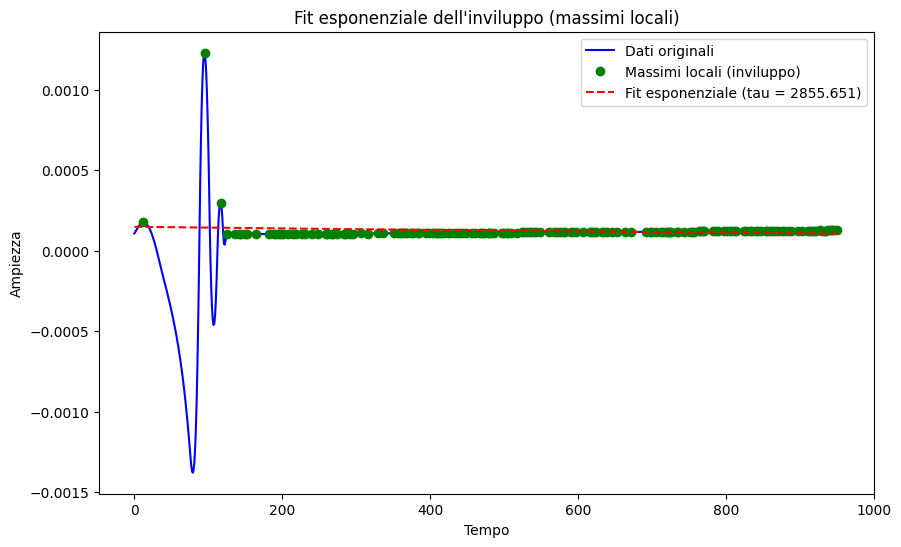

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.signal import find_peaks

# Supponiamo che leg_positions_x sia un array definito
time = np.arange(len(leg_positions_x[45:-1]))  # Array di tempi in base agli indici
y_data = leg_positions_x[45:-1]  # Dati del segnale (senza valore assoluto)

# Trova i massimi locali usando find_peaks
peaks, _ = find_peaks(y_data)  # Restituisce gli indici dei picchi e altre informazioni

peak_values = []
time_peaks = []
# Estrai i valori dei massimi locali per creare l'inviluppo
for value in peaks:
    peak_values.append(y_data[value])
    time_peaks.append(time[value])

# Definisci la funzione esponenziale da adattare
def exp_decay(t, A, tau):
    return A * np.exp(-t / tau)

# Esegui il fit esponenziale sui massimi
params, covariance = curve_fit(exp_decay, time_peaks, peak_values, p0=(peak_values[0], 100))

# Estrai il parametro tau
A_fit, tau_fit = params
print(f"Stima di tau: {tau_fit}")

# Visualizza i risultati
plt.figure(figsize=(10, 6))
plt.plot(time, y_data, 'b-', label='Dati originali')
plt.plot(time[peaks], peak_values, 'go', label='Massimi locali (inviluppo)')
plt.plot(time, exp_decay(time, *params), 'r--', label=f'Fit esponenziale (tau = {tau_fit:.3f})')
plt.xlabel('Tempo')
plt.ylabel('Ampiezza')
plt.legend()
plt.title('Fit esponenziale dell\'inviluppo (massimi locali)')
plt.show()